# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Data Set Description

In [2]:
df = pd.read_csv("housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Catagorical data
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
df.shape

(20640, 10)

# Data Preparation

In [7]:
#check missing values
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
#Check duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [9]:
#Check column types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [10]:
# Compute correlation matrix
co_mtx = df.corr(numeric_only=True)
# Print correlation matrix
print(co_mtx)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<Axes: >

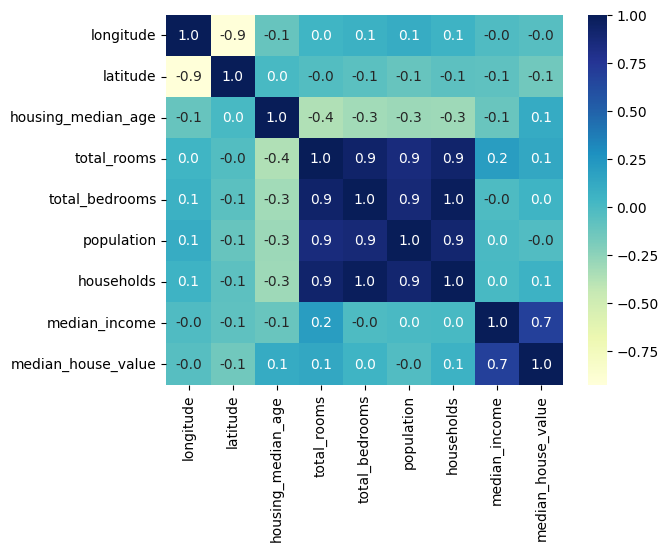

In [11]:
# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True, fmt=".1f")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

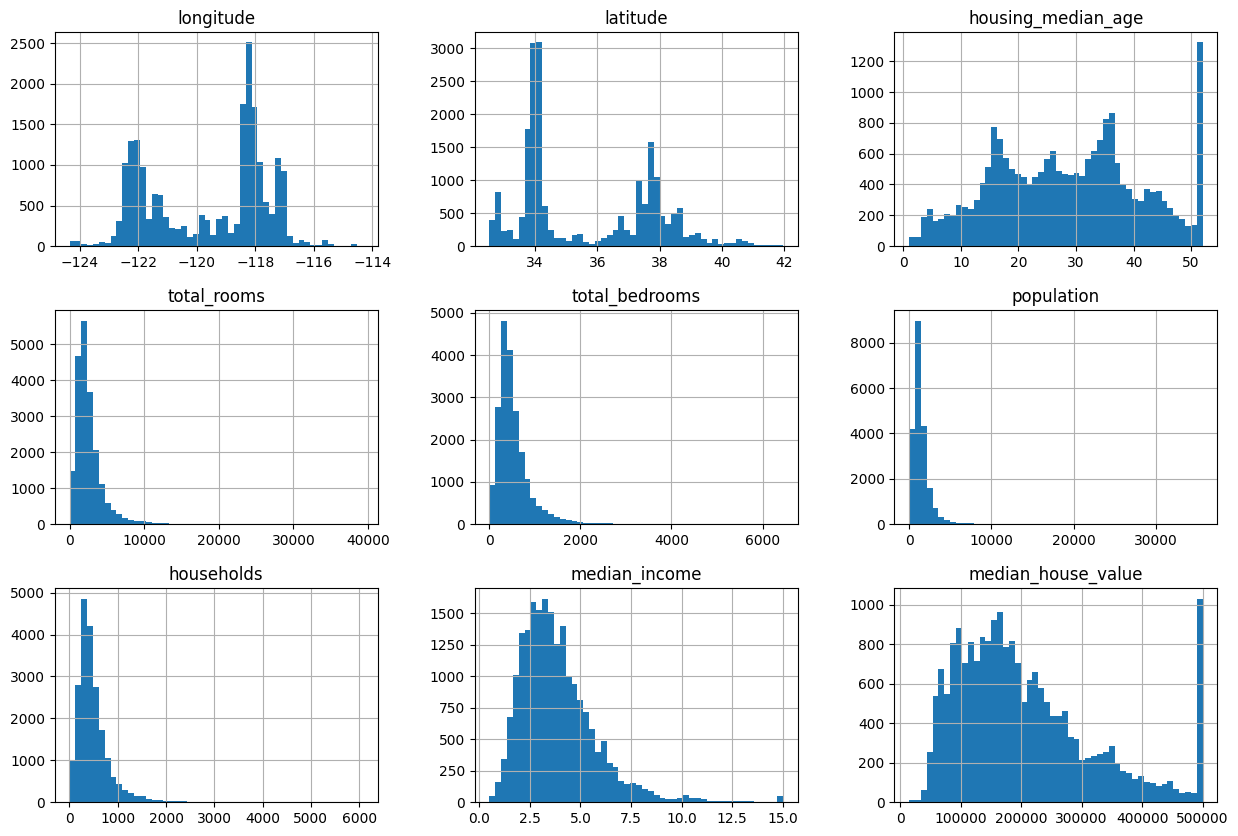

In [12]:
df.hist(bins=50, figsize=(15,10))

## Note

Looking through the plot, we gain some knowledge about each feature:
- The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.
- Regarding the average house age, the distribution is more or less uniform.
- The target distribution has a long tail as well. 

# Exploratory Data Analysis

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

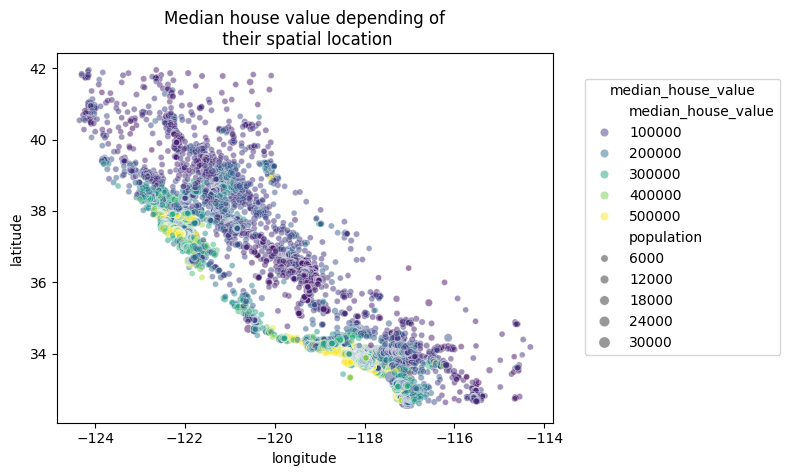

In [13]:
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    size="population",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="median_house_value", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Median house value depending of\n their spatial location")

From above plot we can infer that:
1. Housing prices are much related to location and population density.
2. Housing prices near ocean are higher except in northern california.

# Train and Test set

In [14]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [15]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9226     -120.04     36.93                11.0       3606.0           699.0   
11826    -121.04     39.00                21.0       4059.0           730.0   
4553     -118.24     34.06                33.0        390.0           199.0   
10787    -117.92     33.64                25.0       2224.0           580.0   
4104     -118.35     34.13                39.0       1610.0           278.0   
...          ...       ...                 ...          ...             ...   
11532    -118.09     33.77                26.0       5359.0          1508.0   
16065    -122.48     37.75                49.0       2203.0           407.0   
14501    -117.23     32.86                16.0       1200.0           468.0   
14555    -117.13     32.96                15.0       2267.0           292.0   
11590    -118.01     33.78                26.0       2343.0           377.0   

       population  households  median_income  median_house_value  \
9226       2074.0       644.0         2.6941             63300.0   
11826      1874.0       693.0         4.8051            174300.0   
4553        435.0       193.0         1.1979            350000.0   
10787       985.0       516.0         3.1305            268800.0   
4104        511.0       278.0         4.3333            385900.0   
...           ...         ...            ...                 ...   
11532      1829.0      1393.0         1.7675             61300.0   
16065      1052.0       405.0         4.4375            329200.0   
14501       648.0       443.0         3.0450            100000.0   
14555      1180.0       289.0         6.7120            240200.0   
11590      1166.0       373.0         6.0000            233100.0   

      ocean_proximity  
9226           INLAND  
11826          INLAND  
4553        <1H OCEAN  
10787       <1H OCEAN  
4104        <1H OCEAN  
...               ...  
11532       <1H OCEAN  
16065        NEAR BAY  
14501      NEAR OCEAN  
14555       <1H OCEAN  
11590       <1H OCEAN  

[16512 rows x 10 columns]

In [16]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6607     -118.14     34.18                47.0       3457.0           622.0   
884      -121.97     37.54                31.0       1949.0           344.0   
9457     -123.84     39.83                19.0       1461.0           340.0   
18681    -121.82     36.86                17.0       1573.0           272.0   
4654     -118.33     34.05                48.0       2405.0           527.0   
...          ...       ...                 ...          ...             ...   
19314    -122.87     38.43                36.0       1987.0           387.0   
15433    -117.25     33.20                10.0       2050.0           473.0   
3631     -118.43     34.23                35.0       2049.0           390.0   
3689     -118.36     34.23                15.0       2485.0           742.0   
11895    -117.36     33.97                32.0       1625.0           335.0   

       population  households  median_income  median_house_value  \
6607       1700.0       579.0         3.5164            226500.0   
884         986.0       322.0         4.6349            196200.0   
9457        515.0       227.0         1.5278            145800.0   
18681       142.0        55.0         2.1719            420000.0   
4654       1868.0       502.0         3.3750            257800.0   
...           ...         ...            ...                 ...   
19314      1065.0       347.0         4.0446            172200.0   
15433      1302.0       471.0         2.7961            131300.0   
3631       1286.0       385.0         4.4432            181500.0   
3689       1994.0       670.0         2.8333            183200.0   
11895      1212.0       327.0         2.7596             82200.0   

      ocean_proximity  
6607        <1H OCEAN  
884         <1H OCEAN  
9457       NEAR OCEAN  
18681      NEAR OCEAN  
4654        <1H OCEAN  
...               ...  
19314       <1H OCEAN  
15433       <1H OCEAN  
3631        <1H OCEAN  
3689        <1H OCEAN  
11895          INLAND  

[4128 rows x 10 columns]

In [17]:
df["median_income_categories"] = pd.cut(df["median_income"],
                                        bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                        labels=[1, 2, 3, 4, 5])
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity median_income_categories  
0            NEAR BAY                        5  
1            NEAR BAY                        5  
2            NEAR BAY                        5  
3            NEAR BAY                        4  
4            NEAR BAY                        3  
...               ...                      ...  
20635          INLAND                        2  
20636          INLAND                        2  
20637          INLAND                        2  
20638          INLAND                        2  
20639          INLAND                        2  

[20640 rows x 11 columns]

<Axes: xlabel='median_income_categories'>

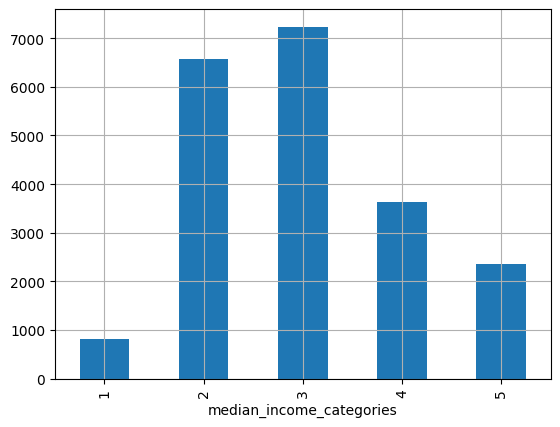

In [18]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid=True)

In [19]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
stratified_split = []
for train_i, test_i in sss.split(df, df["median_income_categories"]):
  stratified_train_set_n = df.iloc[train_i]
  stratified_test_set_n = df.iloc[test_i]
  stratified_split.append([stratified_train_set_n, stratified_test_set_n])

In [20]:
stratified_train_set, stratified_test_set = stratified_split[0]

In [21]:
stratified_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   
...          ...       ...                 ...          ...             ...   
1221     -120.65     38.28                21.0       3095.0           681.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
5747     -118.27     34.17                48.0       1560.0           280.0   
16224    -121.33     37.98                36.0       3113.0           576.0   
8967     -118.40     34.00                37.0       1534.0           258.0   

       population  households  median_income  median_house_value  \
16415       256.0        93.0         3.1719            158300.0   
1279        967.0       320.0         4.4583            253900.0   
7741       1592.0       614.0         2.7875            209000.0   
4425        249.0        82.0         1.6136            137500.0   
1283        101.0        40.0         2.2361             93800.0   
...           ...         ...            ...                 ...   
1221       1341.0       546.0         2.1382            104000.0   
12640       884.0       395.0         2.1679             75400.0   
5747        825.0       269.0         5.5118            354700.0   
16224      1746.0       544.0         3.4625             84600.0   
8967        751.0       259.0         5.4440            336000.0   

      ocean_proximity median_income_categories  
16415          INLAND                        3  
1279           INLAND                        3  
7741        <1H OCEAN                        2  
4425        <1H OCEAN                        2  
1283           INLAND                        2  
...               ...                      ...  
1221           INLAND                        2  
12640          INLAND                        2  
5747        <1H OCEAN                        4  
16224          INLAND                        3  
8967        <1H OCEAN                        4  

[16512 rows x 11 columns]

In [22]:
stratified_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5905     -118.42     34.29                34.0       1489.0           326.0   
4830     -118.30     34.04                37.0       1470.0           399.0   
10969    -117.87     33.76                37.0       4943.0           851.0   
7048     -118.05     33.94                34.0        495.0           120.0   
13721    -117.18     34.07                 7.0       1347.0           301.0   
...          ...       ...                 ...          ...             ...   
3377     -118.29     34.25                19.0       1988.0           594.0   
19816    -119.29     36.54                18.0       2581.0           628.0   
20545    -121.75     38.55                26.0       4802.0           950.0   
3330     -122.48     38.90                10.0        304.0            63.0   
14222    -117.04     32.66                22.0       3362.0           630.0   

       population  households  median_income  median_house_value  \
5905       1389.0       313.0         3.4821            160300.0   
4830       1579.0       390.0         2.0060            150000.0   
10969      2164.0       788.0         4.1071            311300.0   
7048        527.0       130.0         1.9453            149000.0   
13721       799.0       276.0         2.9485            112500.0   
...           ...         ...            ...                 ...   
3377       1399.0       527.0         2.4727            175000.0   
19816      2732.0       592.0         1.8429             58300.0   
20545      2199.0       939.0         3.7452            227700.0   
3330        161.0        61.0         2.1964            112500.0   
14222      1471.0       612.0         4.1442            303900.0   

      ocean_proximity median_income_categories  
5905        <1H OCEAN                        3  
4830        <1H OCEAN                        2  
10969       <1H OCEAN                        3  
7048        <1H OCEAN                        2  
13721          INLAND                        2  
...               ...                      ...  
3377        <1H OCEAN                        2  
19816          INLAND                        2  
20545          INLAND                        3  
3330           INLAND                        2  
14222      NEAR OCEAN                        3  

[4128 rows x 11 columns]

In [23]:
stratified_test_set["median_income_categories"].value_counts()/len(stratified_test_set)

median_income_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [24]:
stratified_train_set["median_income_categories"].value_counts()/len(stratified_train_set)

median_income_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [25]:
str_train_set, str_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["median_income_categories"],
                                               random_state=40)

In [26]:
str_train_set["median_income_categories"].value_counts()/len(str_train_set)

median_income_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [27]:
str_train_set = str_train_set.drop("median_income_categories", axis=1)
str_test_set = str_test_set.drop("median_income_categories", axis=1)

In [28]:
str_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   
...          ...       ...                 ...          ...             ...   
1221     -120.65     38.28                21.0       3095.0           681.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
5747     -118.27     34.17                48.0       1560.0           280.0   
16224    -121.33     37.98                36.0       3113.0           576.0   
8967     -118.40     34.00                37.0       1534.0           258.0   

       population  households  median_income  median_house_value  \
16415       256.0        93.0         3.1719            158300.0   
1279        967.0       320.0         4.4583            253900.0   
7741       1592.0       614.0         2.7875            209000.0   
4425        249.0        82.0         1.6136            137500.0   
1283        101.0        40.0         2.2361             93800.0   
...           ...         ...            ...                 ...   
1221       1341.0       546.0         2.1382            104000.0   
12640       884.0       395.0         2.1679             75400.0   
5747        825.0       269.0         5.5118            354700.0   
16224      1746.0       544.0         3.4625             84600.0   
8967        751.0       259.0         5.4440            336000.0   

      ocean_proximity  
16415          INLAND  
1279           INLAND  
7741        <1H OCEAN  
4425        <1H OCEAN  
1283           INLAND  
...               ...  
1221           INLAND  
12640          INLAND  
5747        <1H OCEAN  
16224          INLAND  
8967        <1H OCEAN  

[16512 rows x 10 columns]

## Correlation

In [29]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity median_income_categories  
0            NEAR BAY                        5  
1            NEAR BAY                        5  
2            NEAR BAY                        5  
3            NEAR BAY                        4  
4            NEAR BAY                        3  
...               ...                      ...  
20635          INLAND                        2  
20636          INLAND                        2  
20637          INLAND                        2  
20638          INLAND                        2  
20639          INLAND                        2  

[20640 rows x 11 columns]

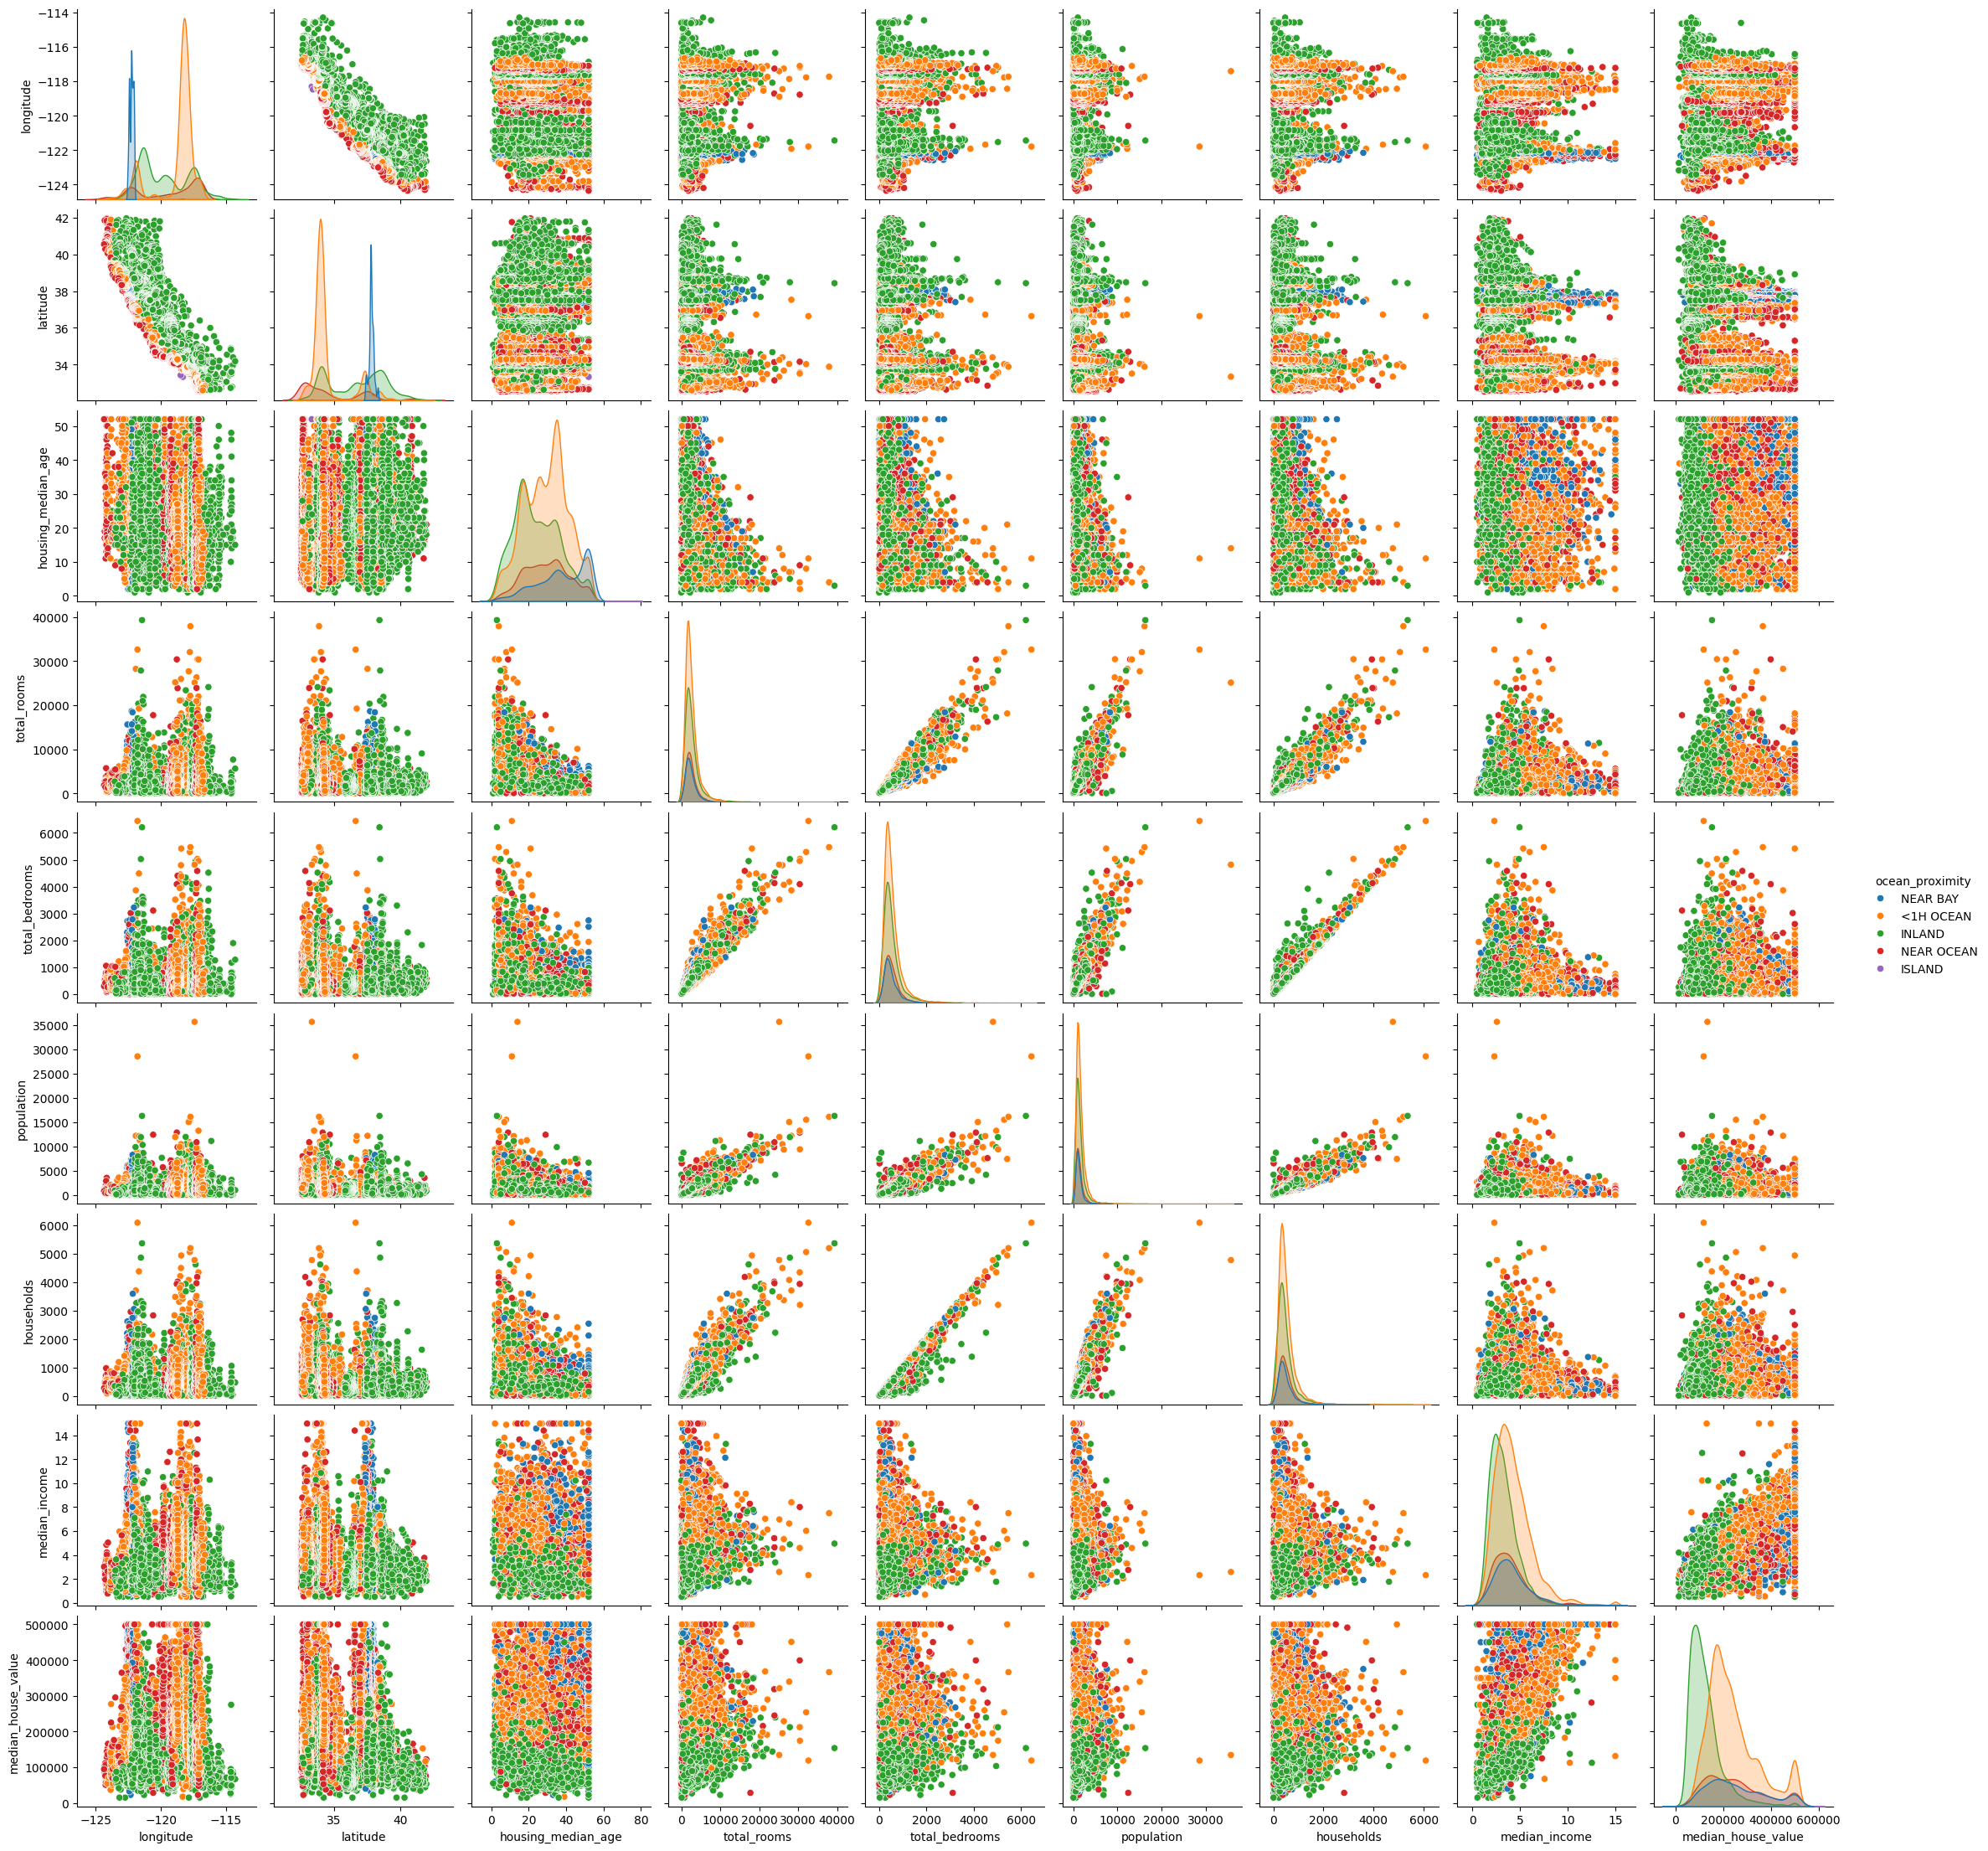

In [30]:
df2 = df.drop(['ocean_proximity', 'median_income_categories'], axis=1)

sns.pairplot(df, hue="ocean_proximity")

In [31]:
corr = df2.corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000